## CREDIT RISK MODELLING

At the core of modern financial institutions are the assessment and evaluation of credit risks. Financial institutions, banks, and fintech firms must be able to accurately evaluate the risks of borrowers in order to:
 - Minimize defaults
 - Optimize the interest rate of the loans
 - Improve the allocation of capital
 - Align with regulatory requirements (Basel III, IFRS 9)
 - Maintain the stability of the portfolio during economic crises

Lending Club Loan Data (2007-2020) offers actual-world data related to borrowers, including loan grades, interest rates, debt-to-income ratios, revolving utilization, employment length, and default risks.
This project will simulate my role as a Credit Risk Analyst/Data Scientist working within a financial institution, creating a predictive model to determine the probability of default and derive portfolio insights.

In [11]:
#importing the neccessary libraries
from pathlib import Path

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
#reading the data
file_path = Path(
    r"C:\Users\Isaac Oppong Agyei\Documents\Risk Analysis\RISK-ANALYSIS\data\raw\accepted_2007_to_2018Q4.csv")

df = pd.read_csv(file_path, low_memory=False, nrows=500000)

print("Dataset loaded successfully.")
print("Shape:", df.shape)

df.head()

Dataset loaded successfully.
Shape: (500000, 151)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Selecting the needed columns to support my analysis
dtypes = {
    "loan_amnt": "float32",
    "int_rate": "float32",
    "annual_inc": "float32",
    "dti": "float32",
    "revol_util": "float32",
    "grade": "category",
    "home_ownership": "category",
    "loan_status": "category"}

df = df[dtypes.keys()].astype(dtypes)

print(df.shape)
print(df.head())

(500000, 8)
   loan_amnt   int_rate  annual_inc        dti  revol_util grade  \
0     3600.0  13.990000     55000.0   5.910000   29.700001     C   
1    24700.0  11.990000     65000.0  16.059999   19.200001     C   
2    20000.0  10.780000     63000.0  10.780000   56.200001     B   
3    35000.0  14.850000    110000.0  17.059999   11.600000     C   
4    10400.0  22.450001    104433.0  25.370001   64.500000     F   

  home_ownership loan_status  
0       MORTGAGE  Fully Paid  
1       MORTGAGE  Fully Paid  
2       MORTGAGE  Fully Paid  
3       MORTGAGE     Current  
4       MORTGAGE  Fully Paid  


From the data information the data have 151 columns. FOr efficiency we select only the important columns for our analysis.
created a dictionary to keep our required data to help in out analysis.

In [4]:
# finding information about my data for cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   loan_amnt       499998 non-null  float32 
 1   int_rate        499998 non-null  float32 
 2   annual_inc      499998 non-null  float32 
 3   dti             499782 non-null  float32 
 4   revol_util      499733 non-null  float32 
 5   grade           499998 non-null  category
 6   home_ownership  499998 non-null  category
 7   loan_status     499998 non-null  category
dtypes: category(3), float32(5)
memory usage: 11.0 MB


In [5]:
df['loan_status'].value_counts()

loan_status
Fully Paid            312340
Current               104240
Charged Off            78824
Late (31-120 days)      2977
In Grace Period         1046
Late (16-30 days)        567
Default                    4
Name: count, dtype: int64

In [16]:
#checking for missing values
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing_summary / len(df)) * 100

cleaning_report = pd.DataFrame({
    'Missing_count' : missing_summary,
    'Missing_%': missing_pct})

print(cleaning_report)

                Missing_count  Missing_%
revol_util                267     0.0534
dti                       218     0.0436
int_rate                    2     0.0004
loan_amnt                   2     0.0004
annual_inc                  2     0.0004
grade                       2     0.0004
home_ownership              2     0.0004
loan_status                 2     0.0004


In [17]:
# handling missing values

# Numeric columns
numeric_cols = ['loan_amnt', 'int_rate'
                , 'annual_inc', 'dti', 'revol_util']

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical columns
categorical_cols = ['grade', 'home_ownership'
                    , 'loan_status']

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0])

print('Missing values handled.')
print(df.isnull().sum())

Missing values handled.
loan_amnt         0
int_rate          0
annual_inc        0
dti               0
revol_util        0
grade             2
home_ownership    2
loan_status       2
dtype: int64


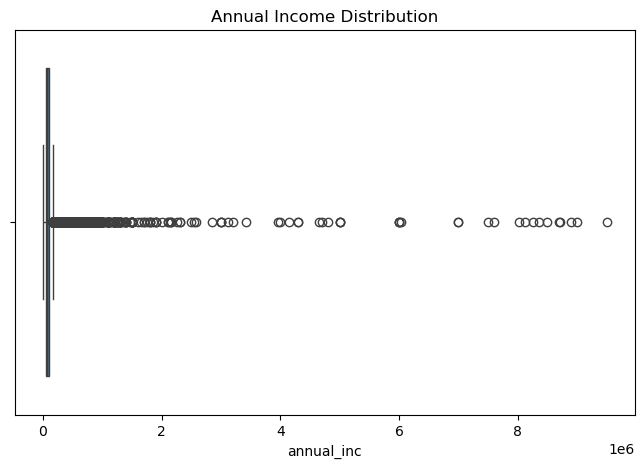

In [18]:
# check for Outliers
# visualise boxplot for annual income distribution

plt.figure(figsize=(8,5))
sns.boxplot(x=df['annual_inc'])
plt.title("Annual Income Distribution")
plt.show()

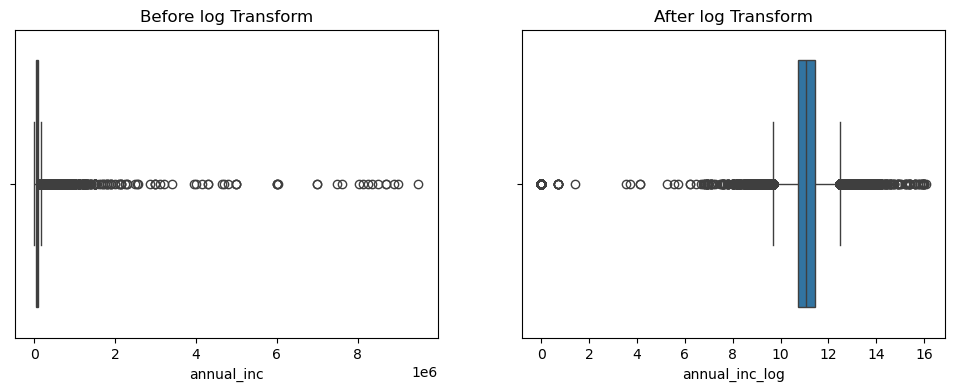

In [21]:
# log transform income to reduce skew
df['annual_inc_log'] = np.log1p(df['annual_inc'])

# compare distributions
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(x=df['annual_inc'])
plt.title('Before log Transform')

plt.subplot(1,2,2)
sns.boxplot(x=df['annual_inc_log'])
plt.title('After log Transform')

plt.show()

In [9]:
# winsorisatoion (Cap Extreme Values)
def cap_outliers(series, lower=0.01, upper=0.99):
    lower_bound = series.quantile(lower)
    upper_bound = series.quantile(upper)
    return series.clip(lower_bound, upper_bound)

for col in numeric_cols:
    df[col] = cap_outliers(df[col])

print("Outliers capped at 1st and 99th percentiles.")

Outliers capped at 1st and 99th percentiles.


In [10]:
# Create target 
default_states = [
    'Charged Off',
    'Default',
    'Late (31-120 days)']

df['default_flag'] = df['loan_status'].isin(default_states).astype(int)

print("Default Rate:", df['default_flag'].mean())

Default Rate: 0.16361


**Data Cleaning Summary.**

Before building the Probability of Default model, the data was cleaned to guarantee statistical validity and avoid biased risk assessments.

1. Handling Missing Values

Missing values were low (less than 0.1% for variables).

Missing values in numerical variables are replaced with the median, as credit data distributions are often skewed.

Missing values in categorical variables are also replaced with the mode, as it maintains category representation. This ensures the size of the dataset is maintained and the distribution is stable.

2.  Financial variables like annual_inc, dti, and revol_util had strong right-skewness.

Rather than trimming outliers (which could represent actual high-risk borrowers), numeric variables are winsorized at the 1st and 99th percentiles to stabilize coefficients while maintaining economic reality.

3. A binary default_flag was created based on regulatory-aligned default states:

Charged Off - Debt is uncollectable and written off as a financial loss.

Default - High risk that the dept won't be paid.

Late (31–120 days) - Reporting issue to authorities, first stage for collection.

This enables estimation of Probability of Default (PD) using supervised learning models.

## EXPLORATORY DATA ANALYSIS